# 원,삼각형,사각형 구분하기
* 어려운 테스트 문제를 기존 CNN모델로 푸는 경우

In [1]:
from google.colab import files
up = files.upload()

Saving hard_handwriting_shape.zip to hard_handwriting_shape.zip


In [2]:
!unzip hard_handwriting_shape.zip -d hard_handwriting_shape

Archive:  hard_handwriting_shape.zip
  inflating: hard_handwriting_shape/test/circle/circle021.png  
  inflating: hard_handwriting_shape/test/circle/circle022.png  
  inflating: hard_handwriting_shape/test/circle/circle023.png  
  inflating: hard_handwriting_shape/test/circle/circle024.png  
  inflating: hard_handwriting_shape/test/circle/circle025.png  
  inflating: hard_handwriting_shape/test/rectangle/rectangle021.png  
  inflating: hard_handwriting_shape/test/rectangle/rectangle022.png  
  inflating: hard_handwriting_shape/test/rectangle/rectangle023.png  
  inflating: hard_handwriting_shape/test/rectangle/rectangle024.png  
  inflating: hard_handwriting_shape/test/rectangle/rectangle025.png  
  inflating: hard_handwriting_shape/test/triangle/triangle021.png  
  inflating: hard_handwriting_shape/test/triangle/triangle022.png  
  inflating: hard_handwriting_shape/test/triangle/triangle023.png  
  inflating: hard_handwriting_shape/test/triangle/triangle024.png  
  inflating: hard_han

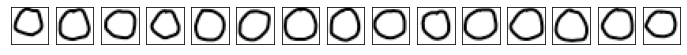

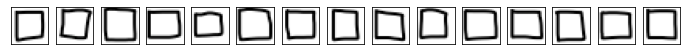

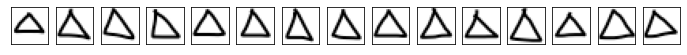

In [3]:
from PIL import Image
import glob
import matplotlib.pyplot as plt

shapes = ['circle','rectangle','triangle']
for shape in shapes:
    dir_name = f'hard_handwriting_shape/train/{shape}'
    plt.figure(figsize=(12,1))
    for i, fname in enumerate(glob.glob(f'{dir_name}/*.png')):
        img = Image.open(fname)
        plt.subplot(1,15,i+1), plt.imshow(img), plt.xticks([]), plt.yticks([])
    plt.show()


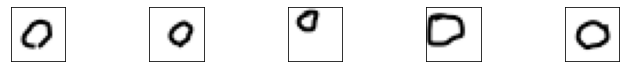

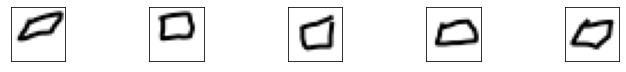

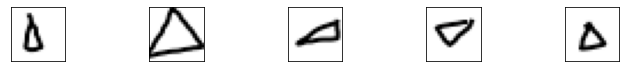

In [4]:
shapes = ['circle','rectangle','triangle']
for shape in shapes:
    dir_name = f'hard_handwriting_shape/test/{shape}'
    plt.figure(figsize=(12,1))
    for i, fname in enumerate(glob.glob(f'{dir_name}/*.png')):
        img = Image.open(fname)
        plt.subplot(1,5,i+1), plt.imshow(img), plt.xticks([]), plt.yticks([])
    plt.show()

In [22]:
import cv2
cv2.imread(fname).shape

(24, 24, 3)

- 데이터셋 생성하기

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
train_data_generator = train_datagen.flow_from_directory(
    'hard_handwriting_shape/train',
    target_size=(24,24),
    batch_size=3,
    class_mode='categorical'
)

Found 45 images belonging to 3 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale=1/255.)
test_data_generator = test_datagen.flow_from_directory(
    'hard_handwriting_shape/test',
    target_size=(24,24),
    batch_size=3,
    class_mode='categorical'
)

Found 15 images belonging to 3 classes.


In [7]:
train_data_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=int32)

In [8]:
train_data_generator.filenames[0]

'circle/circle001.png'

- 모델 정의/설정

In [9]:
import numpy as np
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [11]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=(24,24,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)               819328    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                        

In [12]:
model.compile(
    optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']
)

- 모델 학습

In [13]:
model.fit(
    train_data_generator,
    steps_per_epoch=15,
    epochs=50,
    validation_data=test_data_generator,
    validation_steps=5
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
15/15 [==============================] - 1s 45ms/step - loss: 1.0425 - accuracy: 0.6222 - val_loss: 1.1885 - val_accuracy: 0.4000
Epoch 2/50
15/15 [==============================] - 0s 27ms/step - loss: 0.3905 - accuracy: 0.8444 - val_loss: 2.3268 - val_accuracy: 0.4000
Epoch 3/50
15/15 [==============================] - 0s 29ms/step - loss: 0.0855 - accuracy: 1.0000 - val_loss: 3.2959 - val_accuracy: 0.4000
Epoch 4/50
15/15 [==============================] - 0s 31ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 4.6855 - val_accuracy: 0.3333
Epoch 5/50
15/15 [==============================] - 0s 29ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 4.7303 - val_accuracy: 0.4000
Epoch 6/50
15/15 [==============================] - 0s 28ms/step - loss: 4.0031e-04 - accuracy: 1.0000 - val_loss: 4.6905 - val_accuracy: 0.4000
Epoch 7/50
15/15 [==============================] - 0s 27ms/step - loss: 2.9478e-04 - accuracy: 1.0000 - val_loss: 4.8073 - val_accuracy: 0.4000
Epoch

- 모델 평가

In [14]:
model.evaluate(test_data_generator, steps=5)

5/5 [==============================] - 0s 7ms/step - loss: 8.0562 - accuracy: 0.4000


[8.056170463562012, 0.4000000059604645]